In [1]:
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from basic_pitch import ICASSP_2022_MODEL_PATH
from basic_pitch.inference import Model, predict

2024-06-15 17:38:50.302708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 17:38:56.125395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = Model(ICASSP_2022_MODEL_PATH)

2024-06-15 17:39:00.841947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-15 17:39:00.866432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-15 17:39:00.866620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [25]:
INPUT_SOURCE = './test/NOT PIANIKA PREMAN PENSIUN - Tutorial Not Angka Mudah.mp3'

In [26]:
model_output, midi_data, note_events = predict(INPUT_SOURCE, model)

Predicting MIDI for ./test/NOT PIANIKA PREMAN PENSIUN - Tutorial Not Angka Mudah.mp3...


/home/imamaf/.pyenv/versions/3.9.2/lib/python3.9/site-packages/basic_pitch/inference.py:229: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_original, _ = librosa.load(str(audio_path), sr=AUDIO_SAMPLE_RATE, mono=True)
/home/imamaf/.pyenv/versions/3.9.2/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


In [27]:
note_events = [(round(item[0],4), round(item[1],4), item[2], round(item[3]*32767)) for item in note_events]

In [28]:
note_events = sorted(note_events, key=lambda x: x[0])

In [29]:
df = pd.DataFrame(note_events)

In [30]:
df[2].sort_values(ascending=True)

0     31
87    31
85    31
84    31
83    31
      ..
74    76
25    76
46    76
65    90
27    90
Name: 2, Length: 108, dtype: int64

In [31]:
df.describe()

,0,1,2,3
count,108.000000,108.000000,108.000000,108.000000
mean,25.133757,25.726710,63.518519,21696.074074
std,19.432392,19.555844,14.383585,6898.906184
min,0.058000,0.232200,31.000000,7827.000000
25%,5.479600,5.691475,62.500000,14306.000000
50%,23.123800,23.925500,67.000000,25521.500000
75%,42.565900,42.809750,71.250000,27727.750000
max,60.932800,61.909400,90.000000,28765.000000


In [32]:
groups = {
    "oktaf_0" : (12,24),
    "oktaf_1" : (24,36),
    "oktaf_2" : (36,48),
    "oktaf_3" : (48,60),
    "oktaf_4" : (60,72),
    "oktaf_5" : (72,84),
    "oktaf_6" : (84,96),
    "oktaf_7" : (96,108),
    "oktaf_8" : (108,120)}

In [33]:
def oktaf_chart(group_counts, sorted_dict):
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Generate the first bar chart on the first subplot
    axs[0].bar(group_counts.keys(), group_counts.values())
    axs[0].set_title('Bar Chart 1')
    axs[0].set_xlabel('Categories')
    axs[0].set_ylabel('Values')
    plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

    # Generate the second bar chart on the second subplot
    axs[1].bar(sorted_dict.keys(), sorted_dict.values())
    axs[1].set_title('Bar Chart 2')
    axs[1].set_xlabel('Categories')
    axs[1].set_ylabel('Values')
    plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

    # Adjust the layout so everything fits
    plt.tight_layout()

    # Show the plot
    plt.show()

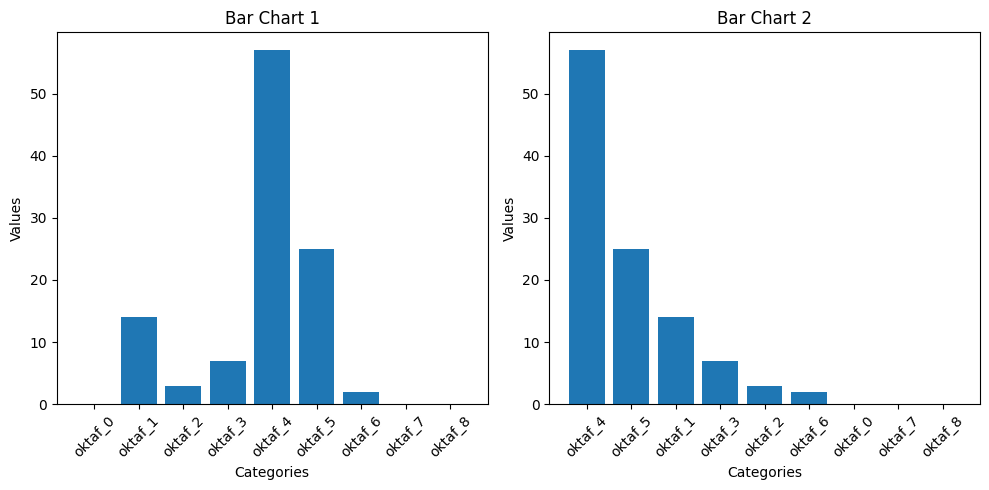

,0,1,2,3
count,108.000000,108.000000,108.000000,108.000000
mean,25.133757,25.726710,63.518519,21696.074074
std,19.432392,19.555844,14.383585,6898.906184
min,0.058000,0.232200,31.000000,7827.000000
25%,5.479600,5.691475,62.500000,14306.000000
50%,23.123800,23.925500,67.000000,25521.500000
75%,42.565900,42.809750,71.250000,27727.750000
max,60.932800,61.909400,90.000000,28765.000000


In [34]:
# Initialize counters for each group
group_counts = {key: 0 for key in groups}

# Iterate through the dataset and count the members in each group
for record in note_events:
    value = record[2]
    for group_name, (lower_bound, upper_bound) in groups.items():
        if lower_bound <= value < upper_bound:
            group_counts[group_name] += 1
            break

# Sorting using sorted() method
sorted_dict = {key: value for key, 
               value in sorted(group_counts.items(), 
                               key=lambda item: item[1], reverse = True)}

oktaf_chart(group_counts=group_counts, sorted_dict=sorted_dict)

df.describe()

In [35]:
top_4 = [key for key, value in sorted(group_counts.items(), key=lambda item: item[1], reverse=True)[:4]]
top_4.sort(reverse=False)
low_key = top_4[:1]
middle_key = top_4[1:3]
high_key = top_4[3:]

In [36]:
middle_key

['oktaf_3', 'oktaf_4']

In [37]:
low_key

['oktaf_1']

In [38]:
high_key

['oktaf_5']

In [39]:
# Initialize a dictionary to hold the grouped data
grouped_data = {key: [] for key in groups.keys()}

# Loop through the song data
for song in note_events:
    # Get the frequency of the song
    frequency = song[2]
    
    # Loop through the groups to find where the frequency fits
    for group, (lower, upper) in groups.items():
        if lower <= frequency < upper:
            # Add the song to the corresponding group
            grouped_data[group].append(song)
            break

# Now, grouped_data contains the song data grouped by the specified groups

# Select the groups from grouped_data that are in list_group
selected_groups = {key: grouped_data[key] for key in top_4 if key in grouped_data}

# Now, selected_groups contains the groups from grouped_data that are in list_group


In [40]:
low = selected_groups[low_key[0]]
middle = [selected_groups[key] for key in middle_key]
middle = [item for sublist in middle for item in sublist]
high = selected_groups[high_key[0]]

In [41]:
low_low = groups[low_key[0]][0]
middle_low = groups[middle_key[0]][0]
high_low = ((groups[high_key[0]][0]) - 12)
low_reduced = [(item[0], item[1], item[2] - low_low, item[3]) for item in low]
mid_reduced = [(item[0], item[1], item[2] - middle_low, item[3]) for item in middle]
high_reduced = [(item[0], item[1], item[2] - high_low, item[3]) for item in high]
# reduced = low_reduced + mid_reduced + high_reduced
reduced = mid_reduced

In [42]:
reduced

[(0.0697, 0.2322, 8, 11028),
 (1.0333, 1.1958, 11, 9013),
 (1.2074, 1.4977, 11, 14935),
 (1.6718, 1.8576, 11, 13605),
 (2.1027, 2.242, 11, 12716),
 (2.9038, 3.2869, 11, 16236),
 (3.1011, 3.2869, 8, 13165),
 (0.1858, 0.4876, 12, 10410),
 (0.6153, 0.8243, 15, 14345),
 (0.685, 0.8475, 12, 11379),
 (0.7546, 0.9056, 20, 11430),
 (1.6951, 1.9156, 16, 20118),
 (1.9156, 2.0911, 16, 18932),
 (1.9621, 2.1027, 20, 15466),
 (2.0911, 2.4626, 16, 19958),
 (2.4626, 2.8225, 16, 18713),
 (2.509, 2.6948, 13, 14076),
 (2.9154, 3.0663, 20, 15037),
 (5.587, 6.5054, 23, 28624),
 (8.0044, 8.6546, 23, 27739),
 (8.8519, 9.3279, 23, 23022),
 (9.3279, 9.7459, 23, 27972),
 (10.2348, 10.6876, 19, 26504),
 (10.676, 11.152, 17, 27043),
 (11.152, 13.1386, 16, 26755),
 (14.0919, 14.5215, 16, 25903),
 (14.5679, 15.0671, 19, 27901),
 (15.0439, 15.9972, 23, 28078),
 (16.0088, 16.4848, 16, 24812),
 (16.5197, 17.0073, 19, 27480),
 (16.9957, 18.1231, 23, 28622),
 (21.1198, 22.1543, 23, 28692),
 (23.7914, 24.4776, 23, 27537)

In [43]:
def oktaf_scatter(df, df_1):
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Generate the first bar chart on the first subplot
    axs[0].set_title('Bar Chart 1')
    axs[0].scatter(df[2], df[3])
    axs[0].set_xlabel('tone')
    axs[0].set_ylabel('flow')
    plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

    # Generate the second bar chart on the second subplot
    axs[1].set_title('Bar Chart 2')
    axs[1].scatter(df_1[2], df_1[3])
    axs[1].set_xlabel('tone')
    axs[1].set_ylabel('flow')
    plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

    # Adjust the layout so everything fits
    plt.tight_layout()

    # Show the plot
    plt.show()

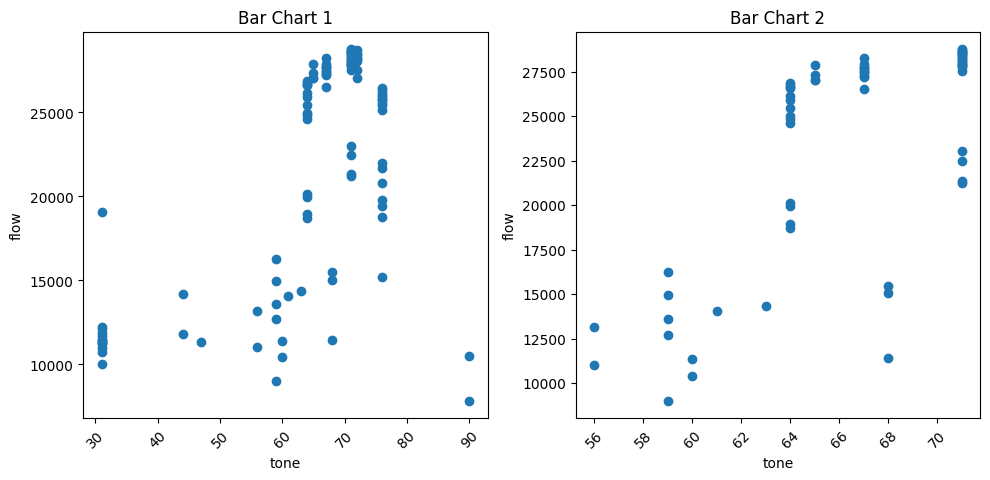

In [44]:
df_1 = pd.DataFrame(middle)
oktaf_scatter(df=df, df_1=df_1)

In [45]:
def cekcek(lagu):
    groups = {
    "oktaf_0" : (12,24),
    "oktaf_1" : (24,36),
    "oktaf_2" : (36,48),
    "oktaf_3" : (48,60),
    "oktaf_4" : (60,72),
    "oktaf_5" : (72,84),
    "oktaf_6" : (84,96),
    "oktaf_7" : (96,108),
    "oktaf_8" : (108,120)}
    
    INPUT_SOURCE = f'./test/{lagu}'
    model_output, midi_data, note_events = predict(INPUT_SOURCE, model)
    note_events = [(round(item[0],4), round(item[1],4), item[2], round(item[3]*32767)) for item in note_events]
    note_events = sorted(note_events, key=lambda x: x[0])
    df = pd.DataFrame(note_events)
    df[2].sort_values(ascending=True)

    Q1 = df[2].quantile(0.25)
    Q3 = df[2].quantile(0.75)
    IQR = Q3-Q1
    lower = df[2] < Q1 - (1.5*IQR)
    higher = df[2] > Q3 + (1.5*IQR)
    print(f"\n\n{Q1}/{Q3}")
    print(IQR)
    print(f"{Q1 - (1.5*IQR)}/{Q3 - (1.5*IQR)}\n")

    df[2].drop(df[2][lower].index, inplace=True)
    df[2].drop(df[2][higher].index, inplace=True)

    # Initialize counters for each group
    group_counts = {key: 0 for key in groups}

    # Iterate through the dataset and count the members in each group
    for record in note_events:
        value = record[2]
        for group_name, (lower_bound, upper_bound) in groups.items():
            if lower_bound <= value < upper_bound:
                group_counts[group_name] += 1
                break

    # Sorting using sorted() method
    sorted_dict = {key: value for key, 
                value in sorted(group_counts.items(), 
                                key=lambda item: item[1], reverse = True)}

    for group_name, (lower_bound, upper_bound) in groups.items():
        if lower_bound <= int(df[2].mean()) < upper_bound:
            print(f'{group_name}')
    
    oktaf_chart(group_counts=group_counts, sorted_dict=sorted_dict)


Predicting MIDI for ./test/short - Bella ciao.mp3...


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/home/imamaf/.pyenv/versions/3.9.2/lib/python3.9/site-packages/basic_pitch/inference.py:229: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_original, _ = librosa.load(str(audio_path), sr=AUDIO_SAMPLE_RATE, mono=True)
/home/imamaf/.pyenv/versions/3.9.2/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)




71.0/77.0
6.0
62.0/68.0

oktaf_5


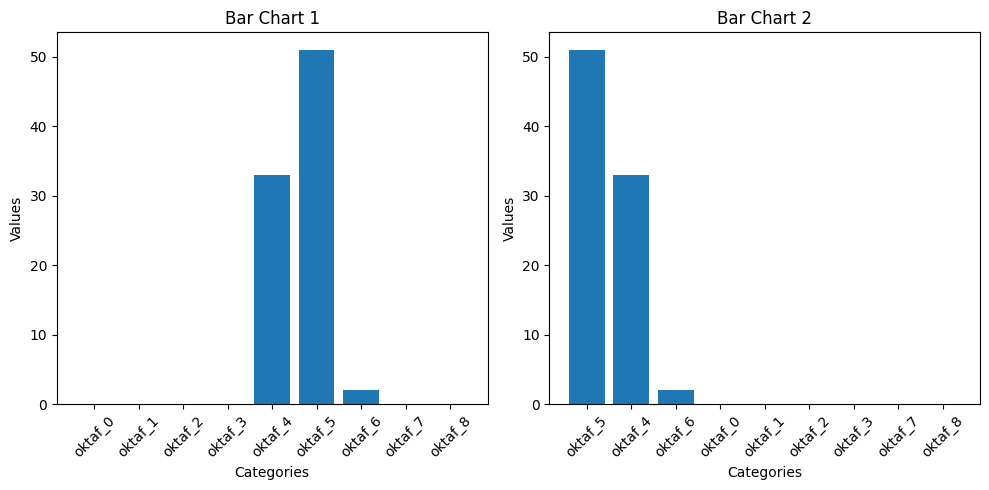

In [46]:
lagu = 'short - Bella ciao.mp3'
cekcek(lagu=lagu)